In [1]:
import pandas as pd 
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\amer_\Desktop\Statistical_modeling_python\data_files\citybike\citybike.csv'  # Replace with your actual file path

df_citybike = pd.read_csv(file_path)

json_file_path = r'C:\Users\amer_\Desktop\Statistical_modeling_python\data_files\foursquare\json\foursquare_output2.json' 

with open(json_file_path, 'r') as file:
    results_list = json.load(file)

foursquare_data = results_list
# Existing code...

N_A = "N/A"  # to return "not available" if it doesn't exist
places = []
postcode = None 

for item in foursquare_data:
    for item1 in item:
        fsq_id = item1['fsq_id']
        name = item1['name']
        country = item1['location']['country']
        latitude = item1['geocodes']['main']['latitude']
        longitude = item1['geocodes']['main']['longitude']
        distance = int(item1['distance'])
        if 'locality' in item1['location']:
            city = item1['location']['locality']
        else: 
            city = N_A
        
        if 'postcode' in item1['location']:
            try:
                postcode = int(item1['location']['postcode'])  # Convert to integer
            except ValueError:
                postcode = None  # Handle cases where postcode is not a valid integer
            
        if 'address' in item1['location']:
            address = item1['location']['address']
        elif 'formatted_address' in item1['location']:
            address = item1['location']['formatted_address']
            
        categories = []
        for category in item1['categories']:
            category_name = category['name']
            if category_name == "":
                categories = ["N/A"]
            else:
                categories.append(category_name)
        
        categories_str = ', '.join(categories)
            
        places.append({
            'name': name,
            'distance': distance,
            'address': address,
            'zip_code': postcode,
            'city': city,
            'latitude': latitude,
            'longitude': longitude,
            'categories': categories_str
        })

df_foursquare_pre = pd.DataFrame(places)
df_foursquare = df_foursquare_pre.drop_duplicates('name')


json_file_path = r'C:\Users\amer_\Desktop\Statistical_modeling_python\data_files\yelp\json\all_responses.json'
# all_responses is from the previous cell. the json_file_path is just to specify in case of a crash of VScode
with open(json_file_path, 'r') as file:
    all_responses = json.load(file)
all_data = []

for response_data in all_responses:
    businesses = response_data['businesses']
    
    for business in businesses:
        business_id = business['id']
        name = business['name']
        distance = round(business['distance'])
        address = business['location']['address1']
        city = business['location']['city']
        
        # Convert zip_code to integer or set to None
        try:
            zip_code = int(business['location']['zip_code'])
        except (ValueError, TypeError):
            zip_code = None
        
        latitude = business['coordinates']['latitude']
        longitude = business['coordinates']['longitude']
        rating = business['rating']
        review_count = business['review_count']
        
        categories = []
        
        if 'alias' in business['categories'][0]:
            category_name = business['categories'][0]['alias']
            categories.append(category_name)
        else:
            print("N/A")
        
        categories_str = ', '.join(categories)

        
        all_data.append({
            'name': name,
            'distance': distance,
            'address': address,
            'city': city,
            'zip_code': zip_code,
            'latitude': latitude,
            'longitude': longitude,
            #'rating': rating,
            #'review_count': review_count,
            'categories': categories_str 
        })
df_yelp = pd.DataFrame(all_data)

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [17]:
#foursquare 3 decimals
df_foursquare_1 = df_foursquare.copy()
df_foursquare_1['latitude'] = df_foursquare_1['latitude'].round(3)
df_foursquare_1['longitude'] = df_foursquare_1['longitude'].round(3)

#yelp 3 decimals 
df_yelp_1 = df_yelp.copy()
df_yelp_1['latitude'] = df_yelp_1['latitude'].round(3)
df_yelp_1['longitude'] = df_yelp_1['longitude'].round(3)


df_fsq_yelp = pd.concat([df_foursquare_1, df_yelp_1])
df_fsq_yelp = df_fsq_yelp.drop_duplicates('name')
df_fsq_yelp

df_fsq_yelp = pd.concat([df_foursquare_1, df_yelp_1])
df_fsq_yelp = df_fsq_yelp.drop_duplicates('name')

df_citybike_1 = df_citybike.copy()
df_citybike_1['latitude'] = df_citybike_1['latitude'].round(3)
df_all = pd.merge(df_citybike_1, df_fsq_yelp, on = ['latitude'])
df_all = df_all[df_all['distance'] < 1001]
df_all = df_all.drop_duplicates('name')
df_all

,stations_name,latitude,longitude_x,number of bikes,name,distance,address,zip_code,city,longitude_y,categories
0,Alter Markt,48.306,14.284700,5,J. Leibetseder Restaurant- und BarbetriebsgmbH,139,Hauptplatz 12,4020.0,Linz,14.286,Restaurant
1,Alter Markt,48.306,14.284700,5,China-Restaurant Kim San,150,Hauptplatz 4,4020.0,Linz,14.287,Chinese Restaurant
2,Alter Markt,48.306,14.284700,5,Blinis Cafe Restaurant Iris Fabiane Gastronomi...,180,Hauptplatz 3,4020.0,Linz,14.287,Inn
3,Alter Markt,48.306,14.284700,5,Restaurant-Cafe Alte Welt,195,Hauptplatz 4,4020.0,Linz,14.287,Dining and Drinking
4,Alter Markt,48.306,14.284700,5,Jindrak,153,Hauptstr. 35,4020.0,Linz,14.287,bakeries
...,...,...,...,...,...,...,...,...,...,...,...
260,Stockhofstraße,48.296,14.286750,0,Restaurant Bauböck,253,Volksgartenstr. 19,4020.0,Linz,14.290,Restaurant
261,Simonystraße,48.255,14.322757,0,Donauplatz Cafe Pub Restaurant,861,Pestalozzistr. 92,4030.0,Linz,14.311,"Bistro, Café"
269,Menzelweg,48.246,14.368654,3,Pferdehof Restaurant & Cafe,457,Ebelsberger Schloßweg 22,4030.0,Linz,14.333,Inn
270,Menzelweg,48.246,14.368654,3,Restaurant Pussy Cat,884,Wambacher Str. 50/1,4030.0,Linz,14.327,Restaurant


In [3]:
path = r'C:\Users\amer_\Desktop\Statistical_modeling_python\data_files\df_all.csv'
df_all.to_csv(path, index = False)

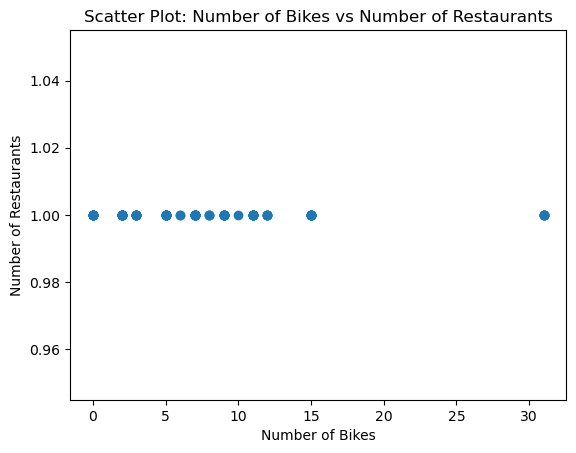

In [21]:
import matplotlib.pyplot as plt
number_of_restaurants = df_all['name'].value_counts()

plt.scatter(df_all['number of bikes'], number_of_restaurants[df_all['name']])
plt.xlabel('Number of Bikes')
plt.ylabel('Number of Restaurants')
plt.title('Scatter Plot: Number of Bikes vs Number of Restaurants')
plt.show()

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

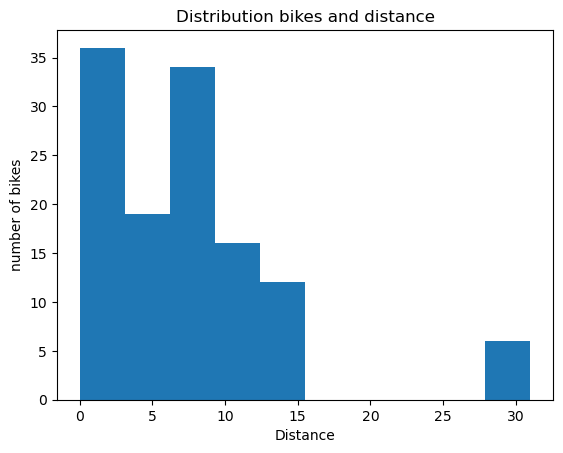

In [20]:
plt.hist(df_all['number of bikes'], bins=10)
plt.xlabel('Distance')
plt.ylabel('number of bikes')
plt.title('Distribution bikes and distance')
plt.show()

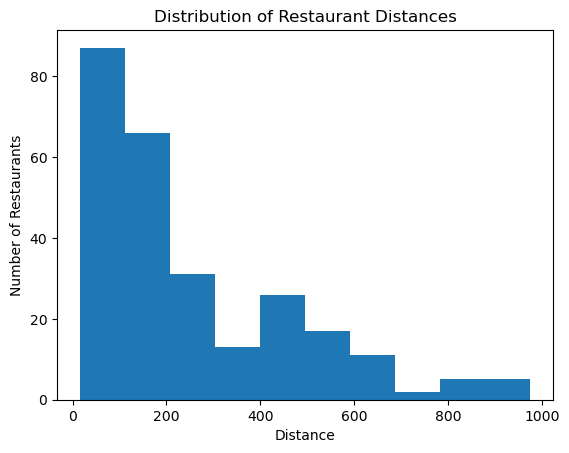

In [14]:
plt.hist(df_all['distance'], bins=10)
plt.xlabel('Distance')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurant Distances')
plt.show()

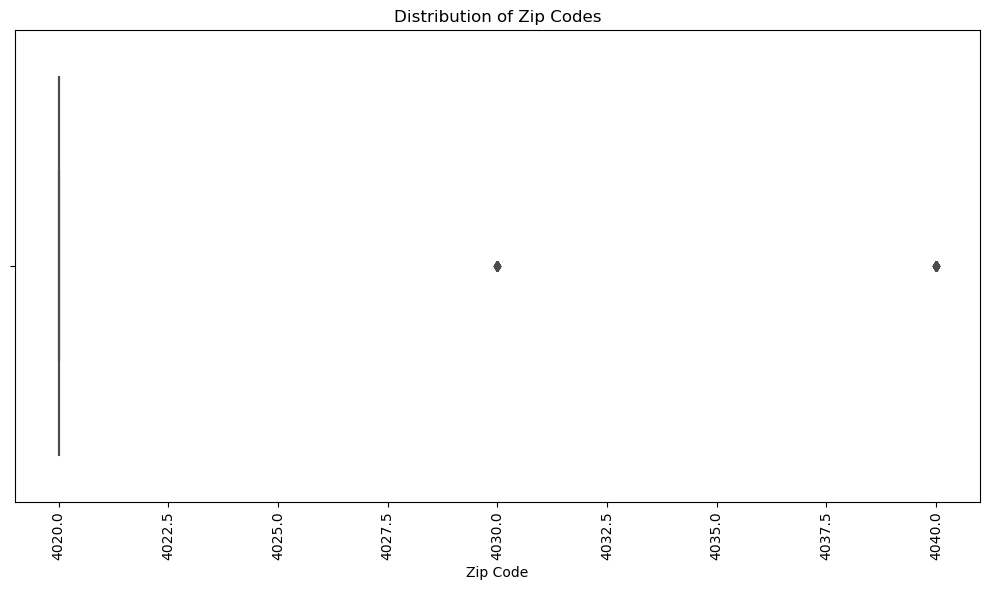

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_all['zip_code'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('Zip Code')
plt.title('Distribution of Zip Codes')
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [41]:
import pandas as pd
import sqlite3

df_all = pd.read_csv(r'C:\Users\amer_\Desktop\Statistical_modeling_python\data_files\df_all.csv')

conn = sqlite3.connect('C:/Users/amer_/Desktop/Statistical_modeling_python/data.db')

cursor = conn.cursor()

cursor = conn.cursor()

# Create the restaurants table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS restaurants (
        stations_name TEXT,
        latitude REAL,
        longitude_x REAL,
        number_of_bikes INTEGER,
        name TEXT,
        distance INTEGER,
        address TEXT,
        zip_code REAL,
        city TEXT,
        longitude_y REAL,
        categories TEXT
    )
''')

for _, row in df_all.iterrows():
    cursor.execute('''
        INSERT INTO restaurants (stations_name, latitude, longitude_x, number_of_bikes, name, distance, address, zip_code, city, longitude_y, categories)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (row['stations_name'], row['latitude'], row['longitude_x'], row['number of bikes'], row['name'], row['distance'], row['address'], row['zip_code'], row['city'], row['longitude_y'], row['categories']))

# Commit the changes and close the connection
conn.commit()
conn.close()


Look at the data before and after the join to validate your data.

In [42]:
conn = sqlite3.connect(r'C:\Users\amer_\Desktop\Statistical_modeling_python\data.db')
cursor = conn.cursor()


cursor.execute("SELECT * FROM restaurants")
rows = cursor.fetchall()


for row in rows:
    print(row)

conn.close()


('Alter Markt', 48.306, 14.2847, 5, 'J. Leibetseder Restaurant- und BarbetriebsgmbH', 139, 'Hauptplatz 12', 4020.0, 'Linz', 14.286, 'Restaurant')
('Alter Markt', 48.306, 14.2847, 5, 'China-Restaurant Kim San', 150, 'Hauptplatz 4', 4020.0, 'Linz', 14.287, 'Chinese Restaurant')
('Alter Markt', 48.306, 14.2847, 5, 'Blinis Cafe Restaurant Iris Fabiane Gastronomiebetriebs GmbH & Co', 180, 'Hauptplatz 3', 4020.0, 'Linz', 14.287, 'Inn')
('Alter Markt', 48.306, 14.2847, 5, 'Restaurant-Cafe Alte Welt', 195, 'Hauptplatz 4', 4020.0, 'Linz', 14.287, 'Dining and Drinking')
('Alter Markt', 48.306, 14.2847, 5, 'Jindrak', 153, 'Hauptstr. 35', 4020.0, 'Linz', 14.287, 'bakeries')
('Alter Markt', 48.306, 14.2847, 5, 'Keintzel', 465, 'Rathausgasse 6 - 8', 4020.0, 'Linz', 14.288, 'austrian')
('Alter Markt', 48.306, 14.2847, 5, 'RIVA', 79, 'Hauptplatz 13', 4020.0, 'Linz', 14.286, 'italian')
('Alter Markt', 48.306, 14.2847, 5, 'K.u.K. Hofbäckerei', 113, 'Pfarrgasse 17', 4020.0, 'Linz', 14.288, 'bakeries')
('